In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor

from sklearn import metrics

Data Collection and Processing

In [66]:
df_train = pd.read_csv('/content/bm_Train.csv')

In [67]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


In [68]:
print("Number of Rows:",df_train.shape[0])
print("Number of Features:",df_train.shape[1])

Number of Rows: 8523
Number of Features: 12


In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [70]:
#Check for missing values
df_train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Mean Method to handle Missing Values in Item_Weight

In [71]:
df_train['Item_Weight'].mean()

np.float64(12.857645184135976)

In [72]:
#Fill missing values in Item_Weight column with mean
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)

In [73]:
df_train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Mode Method to handle Missing Values in Outlet_Size

In [74]:
df_train['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [75]:
#Calculate mode of Outlet_Size column for each Outlet_Type in Outlet_Size
df_train.groupby('Outlet_Type')['Outlet_Size'].agg(pd.Series.mode)

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [76]:
#Fill missing values in Outlet_Size column with mode of Outlet_Size column for each Outlet_Type in Outlet_Size
df_train.loc[df_train['Outlet_Type']=='Grocery Store','Outlet_Size']='Small'
df_train.loc[df_train['Outlet_Type']=='Supermarket Type1','Outlet_Size']='Small'
df_train.loc[df_train['Outlet_Type']=='Supermarket Type2','Outlet_Size']='Medium'
df_train.loc[df_train['Outlet_Type']=='Supermarket Type3','Outlet_Size']='Medium'

In [77]:
df_train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [78]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.55,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


#Data Visualization of Numerical Features

In [79]:
sns.set()

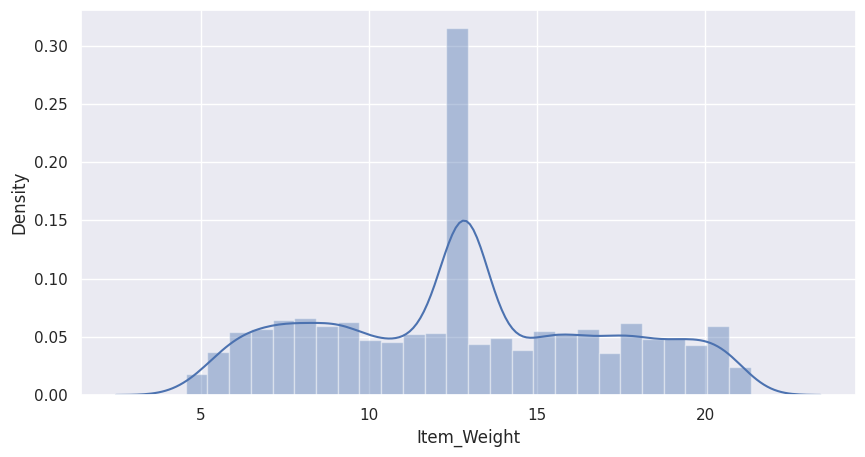

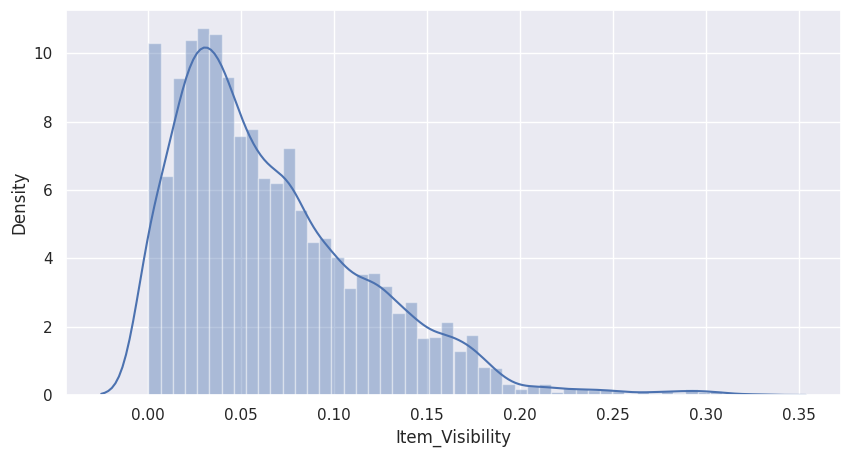

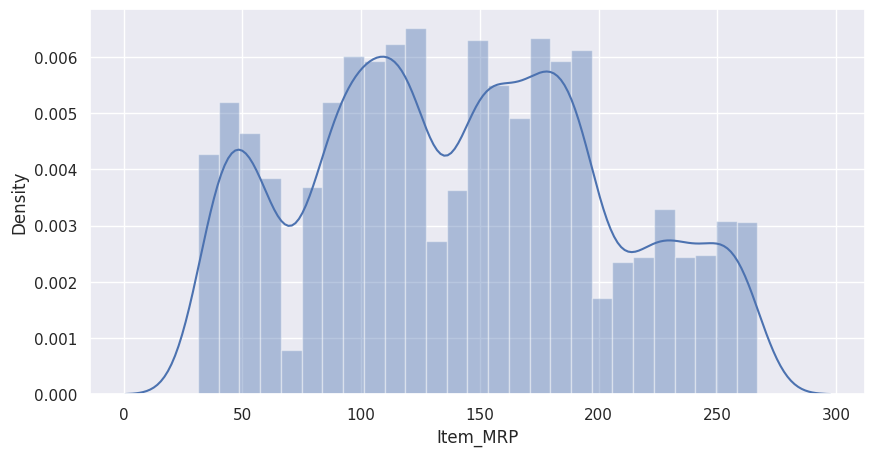

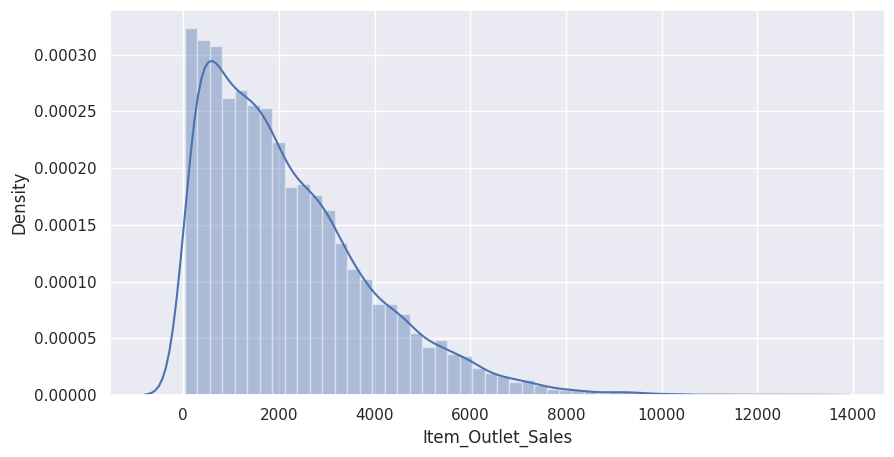

In [80]:
#Plot distplot for numerical columns
cols = ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']
for col in cols:
    plt.figure(figsize=(10,5))
    sns.distplot(df_train[col])
    plt.show()

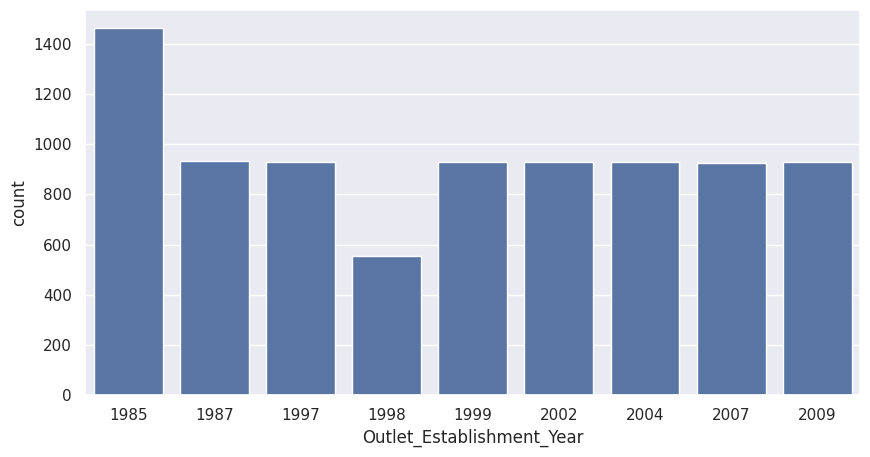

In [81]:
#Plot countplot for Outlet_Establishment_Year column
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Establishment_Year', data=df_train)
plt.show()

#Data Visualization of Categorical Features

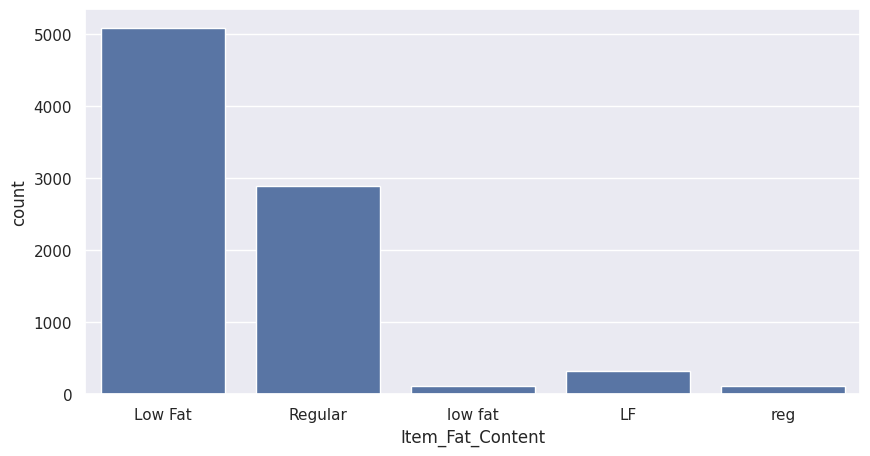

In [82]:
#Plot countplot for Item_Fat_Content column
plt.figure(figsize=(10,5))
sns.countplot(x= "Item_Fat_Content" , data=df_train)
plt.show()

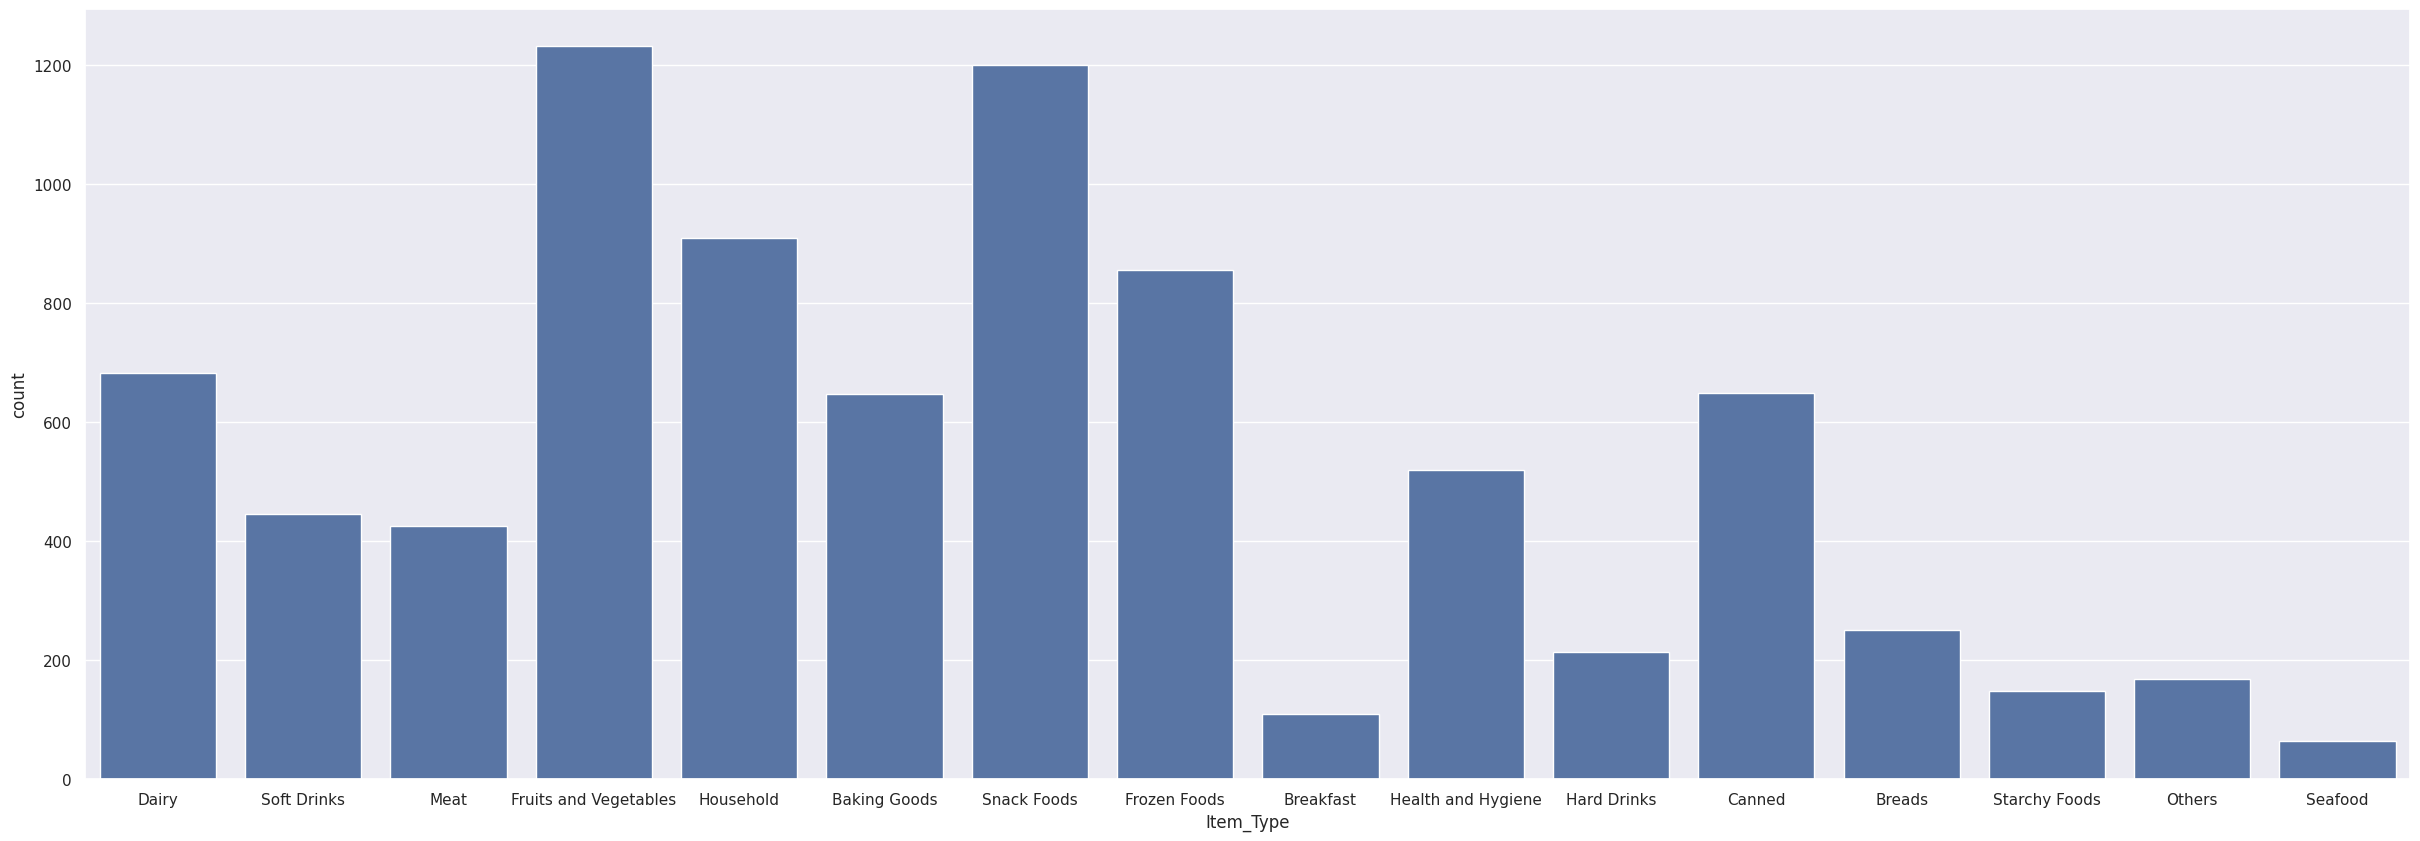

In [83]:
#Plot countplot for Item_Type column
plt.figure(figsize=(30,10))
sns.countplot(x= "Item_Type" , data=df_train)
plt.show()

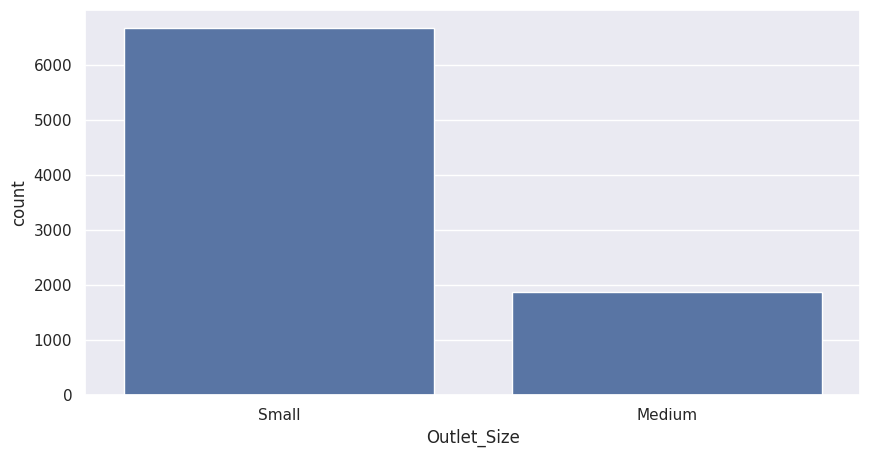

In [84]:
#Plot countplot for Outlet_Size column
plt.figure(figsize=(10,5))
sns.countplot(x= "Outlet_Size" , data=df_train)
plt.show()

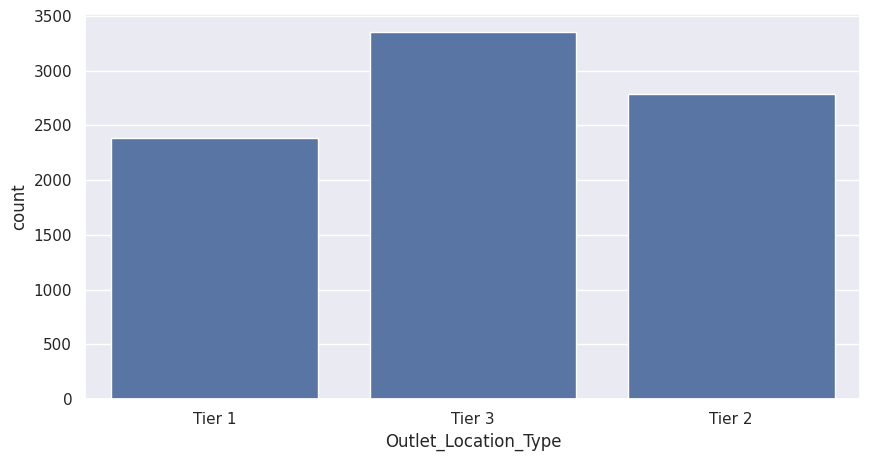

In [85]:
#Plot countplot for Outlet_Location_Type column
plt.figure(figsize=(10,5))
sns.countplot(x= "Outlet_Location_Type" , data=df_train)
plt.show()

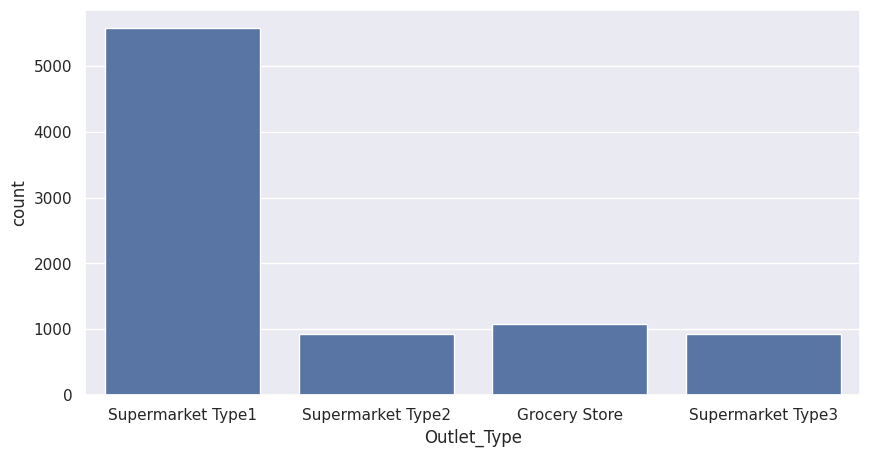

In [86]:
#Plot countplot for Outlet_Type column
plt.figure(figsize=(10,5))
sns.countplot(x= "Outlet_Type" , data=df_train)
plt.show()

In [87]:
#see categories in Item_Fat_Content column
df_train['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [88]:
df_train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)

In [89]:
df_train['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [90]:
le = LabelEncoder()
df_train['Item_Fat_Content'] = le.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type'] = le.fit_transform(df_train['Item_Type'])
df_train['Outlet_Size'] = le.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type'] = le.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type'] = le.fit_transform(df_train['Outlet_Type'])
df_train['Item_Identifier'] = le.fit_transform(df_train['Item_Identifier'])
df_train['Outlet_Identifier'] = le.fit_transform(df_train['Outlet_Identifier'])

In [91]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.02,4,249.81,9,1999,1,0,1,3735.14
1,8,5.92,1,0.02,14,48.27,3,2009,0,2,2,443.42
2,662,17.50,0,0.02,10,141.62,9,1999,1,0,1,2097.27
3,1121,19.20,1,0.00,6,182.09,0,1998,1,2,0,732.38
4,1297,8.93,0,0.00,9,53.86,1,1987,1,2,1,994.71


In [92]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.2 KB


In [93]:
sc = StandardScaler()
df_train['Item_Weight'] = sc.fit_transform(df_train['Item_Weight'].values.reshape(-1,1))
df_train['Item_Visibility'] = sc.fit_transform(df_train['Item_Visibility'].values.reshape(-1,1))
df_train['Item_MRP'] = sc.fit_transform(df_train['Item_MRP'].values.reshape(-1,1))
df_train['Item_Outlet_Sales'] = sc.fit_transform(df_train['Item_Outlet_Sales'].values.reshape(-1,1))

In [94]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,-0.84,0,-0.97,4,1.75,9,1999,1,0,1,0.91
1,8,-1.64,1,-0.91,14,-1.49,3,2009,0,2,2,-1.02
2,662,1.10,0,-0.96,10,0.01,9,1999,1,0,1,-0.05
3,1121,1.50,1,-1.28,6,0.66,0,1998,1,2,0,-0.85
4,1297,-0.93,0,-1.28,9,-1.40,1,1987,1,2,1,-0.70


In [95]:
Features = df_train.drop(columns=['Item_Outlet_Sales'])
Target = df_train['Item_Outlet_Sales']

In [96]:
Target

,Item_Outlet_Sales
0,0.91
1,-1.02
2,-0.05
3,-0.85
4,-0.70
...,...
8518,0.35
8519,-0.96
8520,-0.58
8521,-0.20


In [97]:
Features

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,-0.84,0,-0.97,4,1.75,9,1999,1,0,1
1,8,-1.64,1,-0.91,14,-1.49,3,2009,0,2,2
2,662,1.10,0,-0.96,10,0.01,9,1999,1,0,1
3,1121,1.50,1,-1.28,6,0.66,0,1998,1,2,0
4,1297,-0.93,0,-1.28,9,-1.40,1,1987,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,-1.42,0,-0.18,13,1.18,1,1987,1,2,1
8519,897,-1.06,1,-0.37,0,-0.53,7,2002,1,1,1
8520,1357,-0.53,0,-0.60,8,-0.90,6,2004,1,1,1
8521,681,-1.34,1,1.53,13,-0.61,3,2009,0,2,2


In [37]:
Features_train,Features_test,Target_train,Target_test = train_test_split(Features,Target,test_size=0.2,random_state=42)

In [38]:
print("Shape of Features:",Features.shape)
print("Shape of Features_train:",Features_train.shape)
print("Shape of Features_test:",Features_test.shape)

Shape of Features: (8523, 11)
Shape of Features_train: (6818, 11)
Shape of Features_test: (1705, 11)


In [39]:
print("Shape of Target:",Target.shape)
print("Shape of Target_train:",Target_train.shape)
print("Shape of Target_test:",Target_test.shape)

Shape of Target: (8523,)
Shape of Target_train: (6818,)
Shape of Target_test: (1705,)


In [40]:
XGBRModel = XGBRegressor()

#fit the model
XGBRModel.fit(Features_train,Target_train)

#predict the model
Target_pred = XGBRModel.predict(Features_test)

#calculate R-Squared
r2_score = metrics.r2_score(Target_test,Target_pred)
print("R-Squared:",r2_score)

#calculate Mean Absolute Error
mae = metrics.mean_absolute_error(Target_test,Target_pred)
print("Mean Absolute Error:",mae)

#calculate Mean Squared Error
mse = metrics.mean_squared_error(Target_test,Target_pred)
print("Mean Squared Error:",mse)

R-Squared: 0.5119126417237851
Mean Absolute Error: 0.47173654608004656
Mean Squared Error: 0.45559693922553346


In [42]:
model = RandomForestRegressor()

#fit the model
model.fit(Features_train,Target_train)

#predict the model
Target_pred = model.predict(Features_test)

#calculate R-Squared
r2_score = metrics.r2_score(Target_test,Target_pred)
print("R-Squared:",r2_score)

#calculate Mean Absolute Error
mae = metrics.mean_absolute_error(Target_test,Target_pred)
print("Mean Absolute Error:",mae)

#calculate Mean Squared Error
mse = metrics.mean_squared_error(Target_test,Target_pred)
print("Mean Squared Error:",mse)

R-Squared: 0.5529573949572955
Mean Absolute Error: 0.44830317818979787
Mean Squared Error: 0.4172844043332198


In [41]:
model = SVR()

#fit the model
model.fit(Features_train,Target_train)

#predict the model
Target_pred = model.predict(Features_test)

#calculate R-Squared
r2_score = metrics.r2_score(Target_test,Target_pred)
print("R-Squared:",r2_score)

#calculate Mean Absolute Error
mae = metrics.mean_absolute_error(Target_test,Target_pred)
print("Mean Absolute Error:",mae)

#calculate Mean Squared Error
mse = metrics.mean_squared_error(Target_test,Target_pred)
print("Mean Squared Error:",mse)

R-Squared: -0.024447002815127128
Mean Absolute Error: 0.7432809334031226
Mean Squared Error: 0.9562528325456281


In [46]:
%pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 104.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 14.2 MB/s eta 0:00:00


In [47]:
#Build Lazy Predict Model

from lazypredict.Supervised import LazyRegressor

#Build Lazy Predict Model
reg = LazyRegressor(verbose=0,ignore_warnings=False,custom_metric=None)
models,predictions = reg.fit(Features_train,Features_test,Target_train,Target_test)

#Print model performance
print(models)

  0%|          | 0/42 [00:00<?, ?it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1045
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 11
[LightGBM] [Info] Start training from score 0.012351
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
NuSVR                                        0.61       0.61  0.60        2.45
SVR                                          0.61       0.61  0.60        2.20
MLPRegressor                                 0.

In [48]:
model = GradientBoostingRegressor()

#fit the model
model.fit(Features_train,Target_train)

#predict the model
Target_pred = model.predict(Features_test)

#calculate R-Squared
r2_score = metrics.r2_score(Target_test,Target_pred)
print("R-Squared:",r2_score)

#calculate Mean Absolute Error
mae = metrics.mean_absolute_error(Target_test,Target_pred)
print("Mean Absolute Error:",mae)

#calculate Mean Squared Error
mse = metrics.mean_squared_error(Target_test,Target_pred)
print("Mean Squared Error:",mse)

R-Squared: 0.6035842033061549
Mean Absolute Error: 0.42462716038132786
Mean Squared Error: 0.37002766117978414


In [51]:
model = LGBMRegressor()

#fit the model
model.fit(Features_train,Target_train)

#predict the model
Target_pred = model.predict(Features_test)

#calculate R-Squared
r2_score = metrics.r2_score(Target_test,Target_pred)
print("R-Squared:",r2_score)

#calculate Mean Absolute Error
mae = metrics.mean_absolute_error(Target_test,Target_pred)
print("Mean Absolute Error:",mae)

#calculate Mean Squared Error
mse = metrics.mean_squared_error(Target_test,Target_pred)
print("Mean Squared Error:",mse)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1027
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 11
[LightGBM] [Info] Start training from score 0.012351
R-Squared: 0.5865680743618109
Mean Absolute Error: 0.43394911824178806
Mean Squared Error: 0.3859110806805262


In [52]:
#Save the model
from joblib import dump
dump(XGBRModel, 'XGBRegressor.joblib')

['XGBRegressor.joblib']

#Make a predictive System

In [53]:
df_test = pd.read_csv('/content/bm_Test.csv')
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.01,Snack Foods,107.86,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.04,Dairy,87.32,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.10,Others,241.75,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.32,Low Fat,0.02,Snack Foods,155.03,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.12,Dairy,234.23,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [54]:
df_test.shape

(5681, 11)

In [55]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [56]:
#see categories in Item_Fat_Content column
df_test['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


In [57]:
df_test['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)

In [58]:
df_test['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3668
Regular,2013


In [59]:
le = LabelEncoder()
df_test['Item_Fat_Content'] = le.fit_transform(df_test['Item_Fat_Content'])
df_test['Item_Type'] = le.fit_transform(df_test['Item_Type'])
df_test['Outlet_Size'] = le.fit_transform(df_test['Outlet_Size'])
df_test['Outlet_Location_Type'] = le.fit_transform(df_test['Outlet_Location_Type'])
df_test['Outlet_Type'] = le.fit_transform(df_test['Outlet_Type'])
df_test['Item_Identifier'] = le.fit_transform(df_test['Item_Identifier'])
df_test['Outlet_Identifier'] = le.fit_transform(df_test['Outlet_Identifier'])

In [60]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   int64  
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   int64  
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   int64  
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   int64  
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   int64  
 9   Outlet_Location_Type       5681 non-null   int64  
 10  Outlet_Type                5681 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 488.3 KB


In [61]:
sc = StandardScaler()
df_test['Item_Weight'] = sc.fit_transform(df_test['Item_Weight'].values.reshape(-1,1))
df_test['Item_Visibility'] = sc.fit_transform(df_test['Item_Visibility'].values.reshape(-1,1))
df_test['Item_MRP'] = sc.fit_transform(df_test['Item_MRP'].values.reshape(-1,1))

In [62]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,1.73,0,-1.13,13,-0.54,9,1999,1,0,1
1,1067,-0.94,1,-0.53,4,-0.87,2,2007,3,1,1
2,1406,0.41,0,0.66,11,1.63,0,1998,3,2,0
3,809,-1.15,0,-0.98,13,0.23,2,2007,3,1,1
4,1184,NaN,1,1.03,4,1.51,5,1985,1,2,3


In [63]:
from joblib import load
model = load('XGBRegressor.joblib')
#predict the model
Target_pred = model.predict(df_test)

In [64]:
#print each Item_Identifier with its predicted value and put the result in dataframe
df = pd.DataFrame({'Item_Identifier':df_test['Item_Identifier'],'Item_Outlet_Sales':Target_pred})
df


,Item_Identifier,Item_Outlet_Sales
0,1103,-0.32
1,1067,-0.57
2,1406,-1.09
3,809,0.08
4,1184,3.16
...,...,...
5676,231,0.10
5677,306,-0.16
5678,1412,0.02
5679,517,1.22


from matplotlib import pyplot as plt
df['Item_Identifier'].plot(kind='hist', bins=20, title='Item_Identifier')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Item_Outlet_Sales'].plot(kind='hist', bins=20, title='Item_Outlet_Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Item_Identifier', y='Item_Outlet_Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Item_Identifier'].plot(kind='line', figsize=(8, 4), title='Item_Identifier')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Item_Outlet_Sales'].plot(kind='line', figsize=(8, 4), title='Item_Outlet_Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

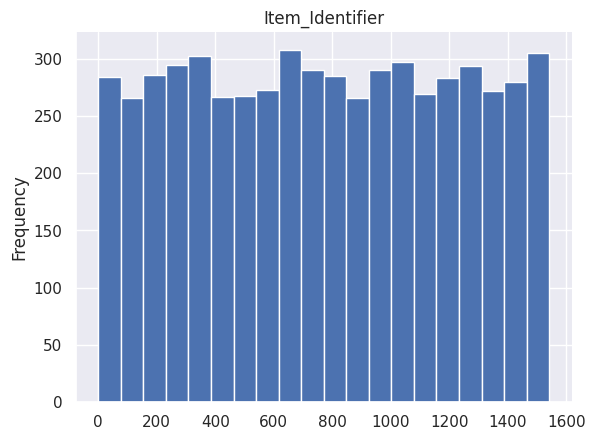

In [65]:
# @title Item_Identifier

from matplotlib import pyplot as plt
df['Item_Identifier'].plot(kind='hist', bins=20, title='Item_Identifier')
plt.gca().spines[['top', 'right',]].set_visible(False)